In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,dlf the arbour,sector 63,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area:...,4.0,4.0,3+,34.0,NaN,Under Construction,NaN,3950.0,2900.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,987.500000
1,flat,birla navya,sector 63a,3.70,15417.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3.0,3.0,3+,1.0,North,Under Construction,NaN,NaN,2400.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,800.000000
2,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3.0,3.0,3+,6.0,North-West,Moderately Old,NaN,NaN,2650.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,883.333333
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.0,Plot area 520(434.79 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,84.0,936.000000
4,flat,ireo the corridors,sector 67a,1.85,9531.0,1941.0,Built Up area: 1941 (180.32 sq.m.),3.0,4.0,3,4.0,East,New Property,NaN,1941.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,150.0,647.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

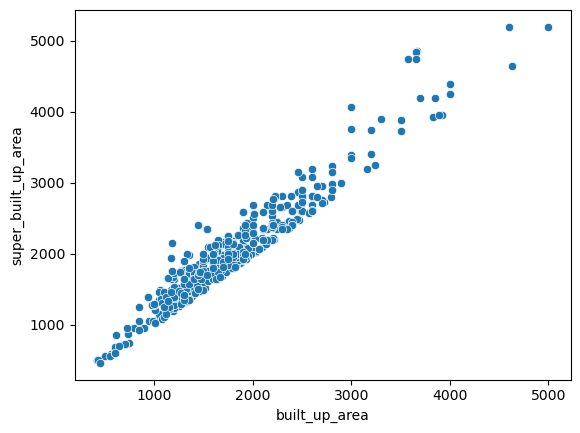

In [6]:
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

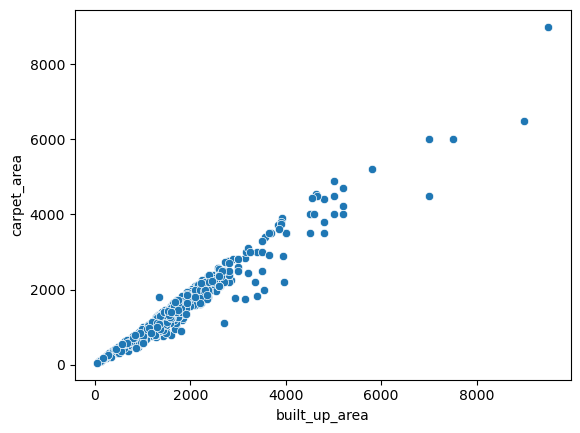

In [7]:
sns.scatterplot(x='built_up_area',y='carpet_area',data=df)

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(531, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
11,flat,ss the leaf,sector 85,1.20,9677.0,1240.0,Super Built up area 1772(164.62 sq.m.)Carpet a...,2.0,2.0,3+,9.0,East,Relatively New,1772.0,NaN,1240.0,0.0,0.0,1.0,0.0,0.0,1.0,148.0,620.000000
28,flat,signature global solera,sector 107,0.40,6645.0,602.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2.0,2.0,1,7.0,NaN,Relatively New,602.0,NaN,548.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,301.000000
31,flat,m3m latitude,sector 65,4.70,19748.0,2380.0,Super Built up area 2380(221.11 sq.m.)Carpet a...,3.0,3.0,3+,9.0,North-East,Relatively New,2380.0,NaN,1231.0,0.0,1.0,0.0,1.0,0.0,0.0,44.0,793.333333
34,flat,shapoorji pallonji joyville gurugram,sector 102,1.20,14563.0,824.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2.0,2.0,3,0.0,North-East,Relatively New,1359.0,NaN,824.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,412.000000
37,flat,sbtl caladium,sector 109,1.35,7181.0,1880.0,Super Built up area 1880(174.66 sq.m.)Carpet a...,3.0,2.0,3+,12.0,West,Relatively New,1880.0,NaN,1128.0,0.0,0.0,0.0,0.0,0.0,1.0,128.0,626.666667


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_54882/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
14,flat,ats marigold,sector 89,1.85,8605.0,2150.0,Super Built up area 2150(199.74 sq.m.),3.0,3.0,3+,12.0,South-West,New Property,2150.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,37.0,716.666667
16,flat,dlf the primus,sector 82a,2.20,10516.0,2092.0,Super Built up area 2092(194.35 sq.m.),3.0,3.0,3+,16.0,North-East,Relatively New,2092.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,174.0,697.333333
17,flat,bestech park view sanskruti,sector 92,1.55,7769.0,1995.0,Super Built up area 1995(185.34 sq.m.),3.0,4.0,3,8.0,North,Relatively New,1995.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,49.0,665.000000
18,flat,dlf the ultima,sector 81,2.30,10994.0,2092.0,Super Built up area 2092(194.35 sq.m.),3.0,4.0,3+,6.0,East,New Property,2092.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,167.0,697.333333
26,flat,corona gracieux,sector 76,1.05,5949.0,1765.0,Super Built up area 1765(163.97 sq.m.),3.0,3.0,3+,7.0,North-East,Relatively New,1765.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,133.0,588.333333


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_54882/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,birla navya,sector 63a,3.70,15417.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3.0,3.0,3+,1.0,North,Under Construction,NaN,NaN,2400.000000,0.0,0.0,0.0,0.0,0.0,1.0,72.0,800.000000
2,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3.0,3.0,3+,6.0,North-West,Moderately Old,NaN,NaN,2650.000000,0.0,1.0,0.0,0.0,0.0,1.0,7.0,883.333333
10,flat,rof ananda,sector 95,0.20,5464.0,366.0,Carpet area: 366.08 (34.01 sq.m.),1.0,1.0,1,9.0,South-West,Relatively New,NaN,NaN,366.080239,0.0,0.0,0.0,1.0,0.0,1.0,52.0,366.000000
15,flat,godrej nature plus,sector 33,1.20,12000.0,1000.0,Carpet area: 1000 (92.9 sq.m.),2.0,2.0,3+,3.0,North-East,Under Construction,NaN,NaN,1000.000000,0.0,0.0,0.0,0.0,0.0,1.0,105.0,500.000000
20,flat,satya element one,sector 49,0.87,19333.0,450.0,Carpet area: 450 (41.81 sq.m.),1.0,1.0,1,2.0,NaN,Relatively New,NaN,NaN,450.000000,0.0,0.0,0.0,0.0,0.0,1.0,22.0,450.000000


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_54882/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

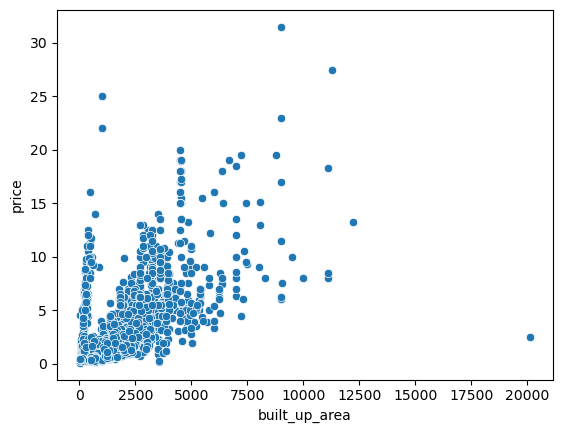

In [29]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
926,2.54,1639.0,1822.0
961,3.20,1800.0,1995.0
2404,4.00,8829.0,981.0
2733,3.50,1080.0,1080.0
1715,6.75,2088.0,232.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

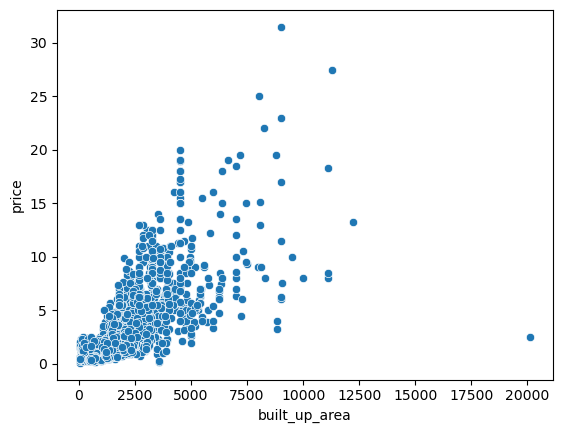

In [34]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the arbour,sector 63,7.90,20000.0,4.0,4.0,3+,34.0,NaN,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
1,flat,birla navya,sector 63a,3.70,15417.0,3.0,3.0,3+,1.0,North,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0
2,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,North-West,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,5.0,6.0,3+,4.0,East,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0
4,flat,ireo the corridors,sector 67a,1.85,9531.0,3.0,4.0,3,4.0,East,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0


In [37]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [38]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
75,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
228,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,0.0,130.0
287,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
639,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,1.0,59.0
890,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1156,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1310,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,0.0,114.0
1659,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1767,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,88.0
1823,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [40]:
df['floorNum'].fillna(2.0,inplace=True)

In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='facing'>

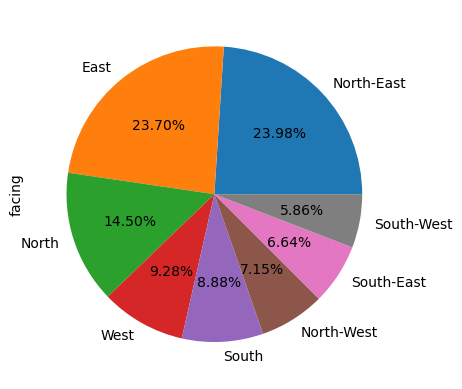

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1202,flat,central park flower valley,sohna road,1.65,17442.0,3.0,3.0,0,1.0,Undefined,1051.0,0.0,0.0,0.0,0.0,0.0,1.0,66.0
1393,flat,rof ananda,sector 95,0.20,5602.0,1.0,1.0,1,2.0,Relatively New,407.0,0.0,0.0,0.0,1.0,0.0,1.0,53.0
1661,flat,central park 2 bellevue,sector 48,5.00,11628.0,3.0,4.0,3,14.0,Moderately Old,4778.0,0.0,0.0,0.0,0.0,0.0,1.0,82.0
623,flat,pareena coban residences,sector 99a,1.40,7011.0,3.0,5.0,3+,6.0,New Property,1807.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
917,flat,bestech park view ananda,sector 81,1.40,7735.0,3.0,3.0,3+,6.0,Relatively New,1475.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0


In [46]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [47]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2166,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df.drop(index=[1628],inplace=True)

In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [50]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           557
Moderately Old         544
Old Property           293
Undefined              291
Under Construction     264
Name: agePossession, dtype: int64

In [51]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,spectrum centre,sector 82a,0.62,9538.0,1.0,1.0,0,6.0,Undefined,650.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,flat,unitech heritage city,sector 14,4.26,13108.0,4.0,4.0,0,9.0,Undefined,3250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,house,independent,sector 103,2.25,6367.0,3.0,5.0,3+,10.0,Undefined,3534.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,house,independent,sector 7,0.53,5889.0,2.0,2.0,0,1.0,Undefined,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41,flat,m3m soulitude,sector 89,1.25,8784.0,3.0,3.0,0,4.0,Undefined,1423.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,house,independent,sector 39,0.34,7556.0,1.0,1.0,1,1.0,Undefined,450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3494,house,unitech espace,sector 50,11.50,35494.0,5.0,6.0,0,1.0,Undefined,3240.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3497,flat,dlf the arbour,sector 63,8.50,21519.0,4.0,4.0,0,27.0,Undefined,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
3504,house,independent,sector 55,2.80,18667.0,4.0,4.0,0,2.0,Undefined,1500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [53]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [54]:
df['agePossession'].value_counts()

Relatively New        1718
New Property           596
Moderately Old         583
Old Property           325
Under Construction     278
Undefined               54
Name: agePossession, dtype: int64

In [55]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [57]:
df['agePossession'].value_counts()

Relatively New        1727
New Property           597
Moderately Old         590
Old Property           328
Under Construction     278
Undefined               34
Name: agePossession, dtype: int64

In [58]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [60]:
df['agePossession'].value_counts()

Relatively New        1729
Moderately Old         622
New Property           597
Old Property           328
Under Construction     278
Name: agePossession, dtype: int64

In [61]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [62]:
df.shape

(3554, 18)

In [63]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)